In [1]:
# CAPSTONE TWO - EDA

# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.chdir('/Users/andrew/Desktop/Capstone Two')

In [2]:
# Read data
df = pd.read_csv('housing.csv')
# Print first 5 rows
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Shape of the data
df.shape #545 rows, 13 columns

(545, 13)

In [4]:
# get non null counts & Data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Search for missing values / NA / NaN
df.isnull().sum()

# If no missing values, print statement
if (df.all().isnull().sum() == 0):
    print("No missing values found.")


No missing values found.


There was a total of 15 outliers identified.


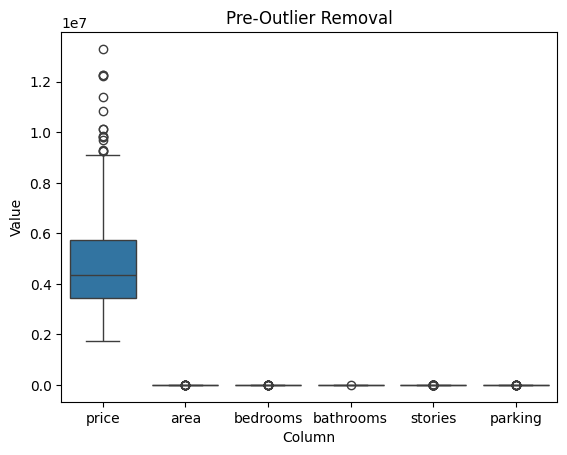

In [6]:
# Outlier Identification
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Pre-Outlier Removal")
# Outliers found in price outside of the IQR

# Identification

# IQR Calculation
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

# Bounds Identification
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

# Find outliers outside of the bounds
outliers = df[(df['price'] <= lowerbound) | (df['price'] >= upperbound)]

# Print number of outliers 
print(f"There was a total of",len(outliers),'outliers identified.')

(530, 13)


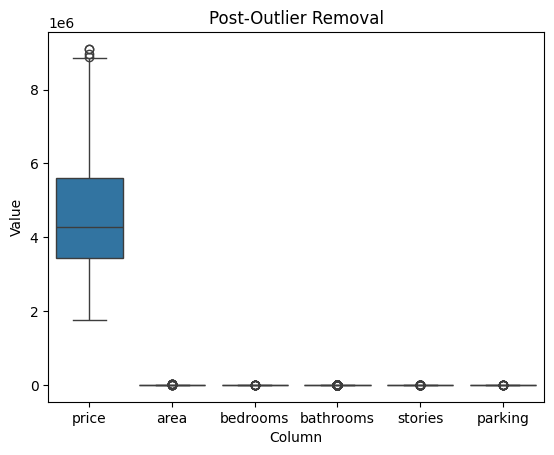

In [7]:
# Subset df to remove outliers
df = df[(df['price'] >= lowerbound) & (df['price'] <= upperbound)]
print(df.shape)

# Plot for confirmation
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Post-Outlier Removal")
plt.show();

In [8]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,530.0,4.600663e+06,1.596119e+06,1750000.0,3430000.0,4270000.0,5600000.00,9100000.0
area,530.0,5.061519e+03,2.075449e+03,1650.0,3547.5,4500.0,6315.75,15600.0
bedrooms,530.0,2.943396e+00,7.305149e-01,1.0,2.0,3.0,3.00,6.0
bathrooms,530.0,1.260377e+00,4.643591e-01,1.0,1.0,1.0,1.00,3.0
stories,530.0,1.788679e+00,8.611902e-01,1.0,1.0,2.0,2.00,4.0
parking,530.0,6.641509e-01,8.433201e-01,0.0,0.0,0.0,1.00,3.0


In [9]:
# Check for Duplicated rows
df.duplicated().sum()

# If no duplicate values, print statement
if (df.duplicated().sum() == 0):
    print("No duplicate values found.")

No duplicate values found.


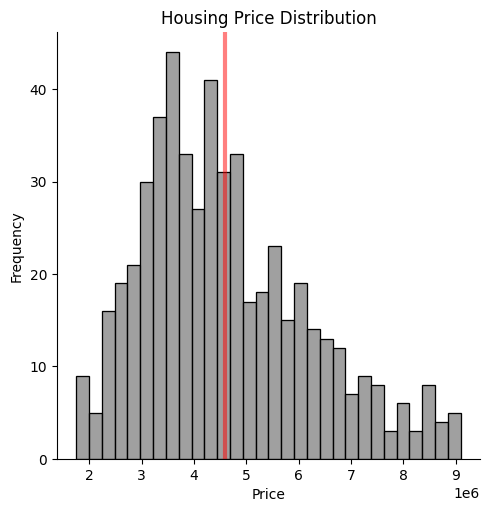

In [10]:
# Housing price distribution
# Calculate mean home price
pricemean = df['price'].mean()

# Distribution plot to show prices
sns.displot(df['price'], bins=30, color='gray')

# Plot features
plt.axvline(pricemean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency');

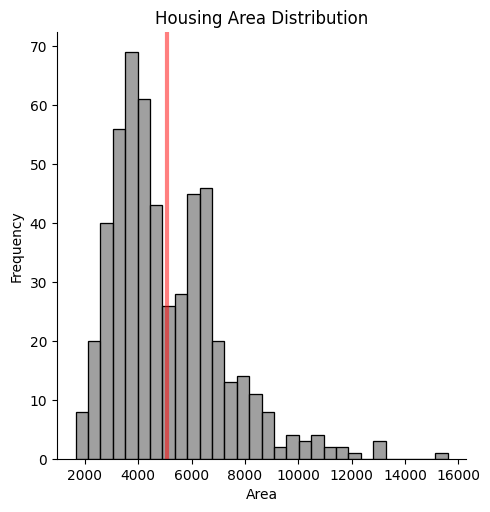

In [11]:
# Housing area distribution
# Calculate mean area per home
areamean = df['area'].mean()

# Dsitribution plot to show areas
sns.displot(df['area'], bins=30, color='gray')

# Plot features
plt.axvline(areamean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency');

# Area and price seem to have a correlation based on the plot distributions

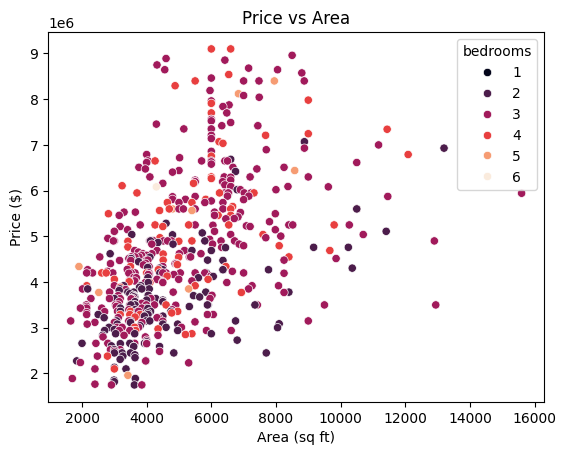

In [12]:
# Area VS Price scatterplot
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='rocket')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show();

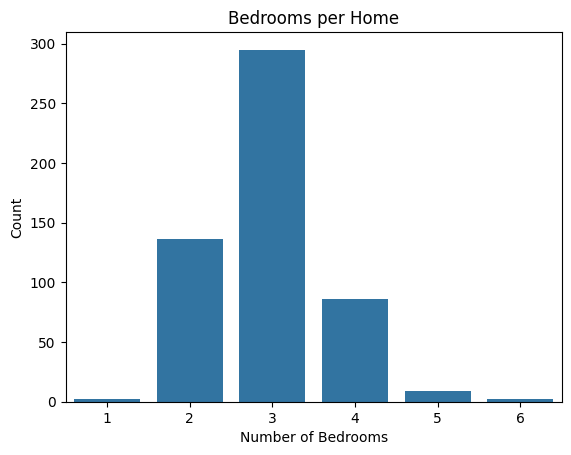

3 Bedrooms is the most frequent in the data, with 295 homes having 3 bedrooms.


In [31]:
# Bedrooms countplot
sns.countplot(x='bedrooms', data=df)
plt.title("Bedrooms per Home")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show();

# Count most frequent value (3)
most_freq = (df['bedrooms'] ==3).sum()

print(f'3 Bedrooms is the most frequent in the data, with',most_freq,'homes having 3 bedrooms.')
# 3 bedrooms is most common for houses in the dataset

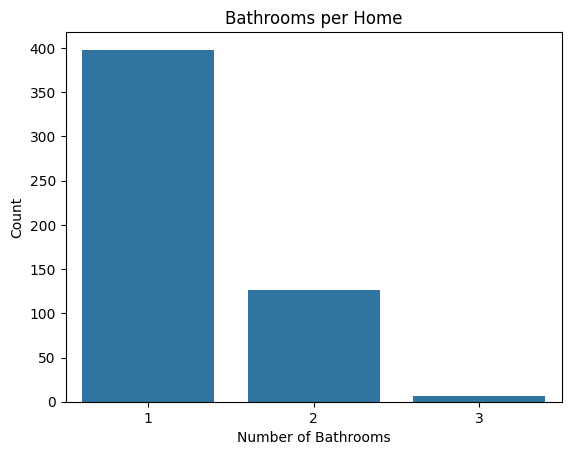

In [14]:
# Bathrooms countplot
sns.countplot(x='bathrooms', data=df)
plt.title("Bathrooms per Home")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show();

print('1 bathroom is most common for houses in the dataset, with very few homes having 3 bathrooms')

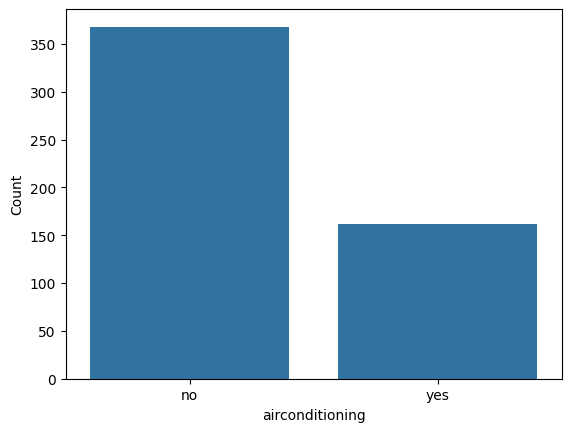

Percent of houses with air conditioning; 30.566 %


In [15]:
# Does the property have A/C?
sns.countplot(x='airconditioning', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have A/C

# Calculate percent of houses with air conditioning
AC_houses = round((df['airconditioning'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with air conditioning;',AC_houses,'%')

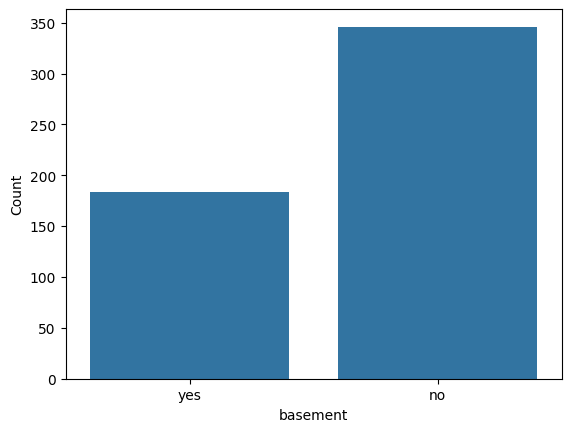

Percent of houses with a basement; 34.717 %


In [16]:
# Basement Countplot
sns.countplot(x='basement', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have a basement

# Count the percent of houses with a basement
basement_houses = round((df['basement'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with a basement;',basement_houses,'%')

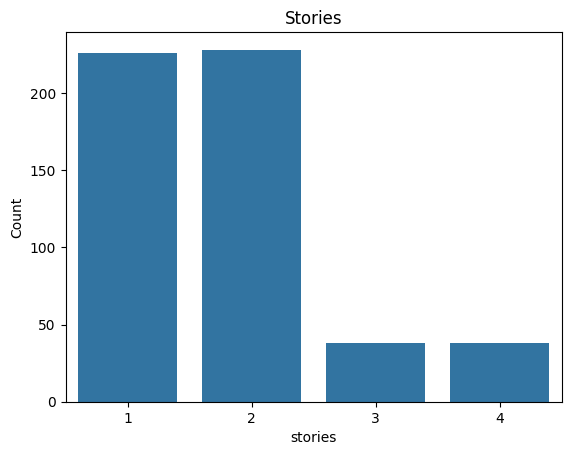

In [17]:
# Stories per house countplot
sns.countplot(x='stories', data=df)
plt.title("Stories")
plt.ylabel('Count')
plt.show();

# Most homes have 1 or 2 stories, with some having up to 4

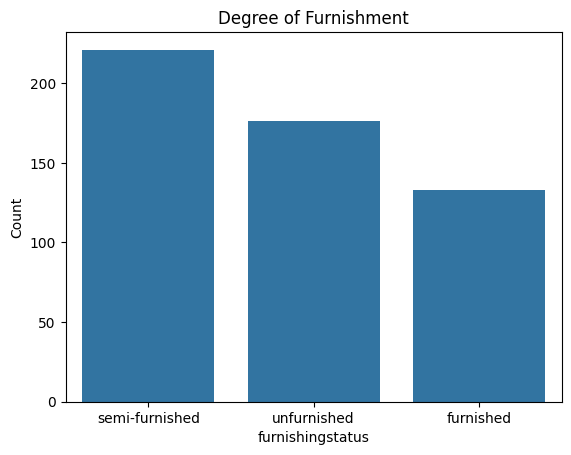

In [18]:
# Furnish countplot
sns.countplot(x='furnishingstatus', data=df)
plt.title("Degree of Furnishment")
plt.ylabel('Count')
plt.show();

In [19]:
# For modelling purposes, category columnns to be converted to numeric
# Replace YES with 1, NO with 0
df = df.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

# For furnishing status, replace furnished with 1, semi furnished with 0.5, and unfurnished with 0
df['furnishingstatus'] = df['furnishingstatus'].replace({
    'furnished':1,
    'semi-furnished':0.5,
    'unfurnished':0
})

/var/folders/pg/4h08z3252px0d9j8fr1zvbrc0000gn/T/ipykernel_66276/3904290694.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))
/var/folders/pg/4h08z3252px0d9j8fr1zvbrc0000gn/T/ipykernel_66276/3904290694.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({


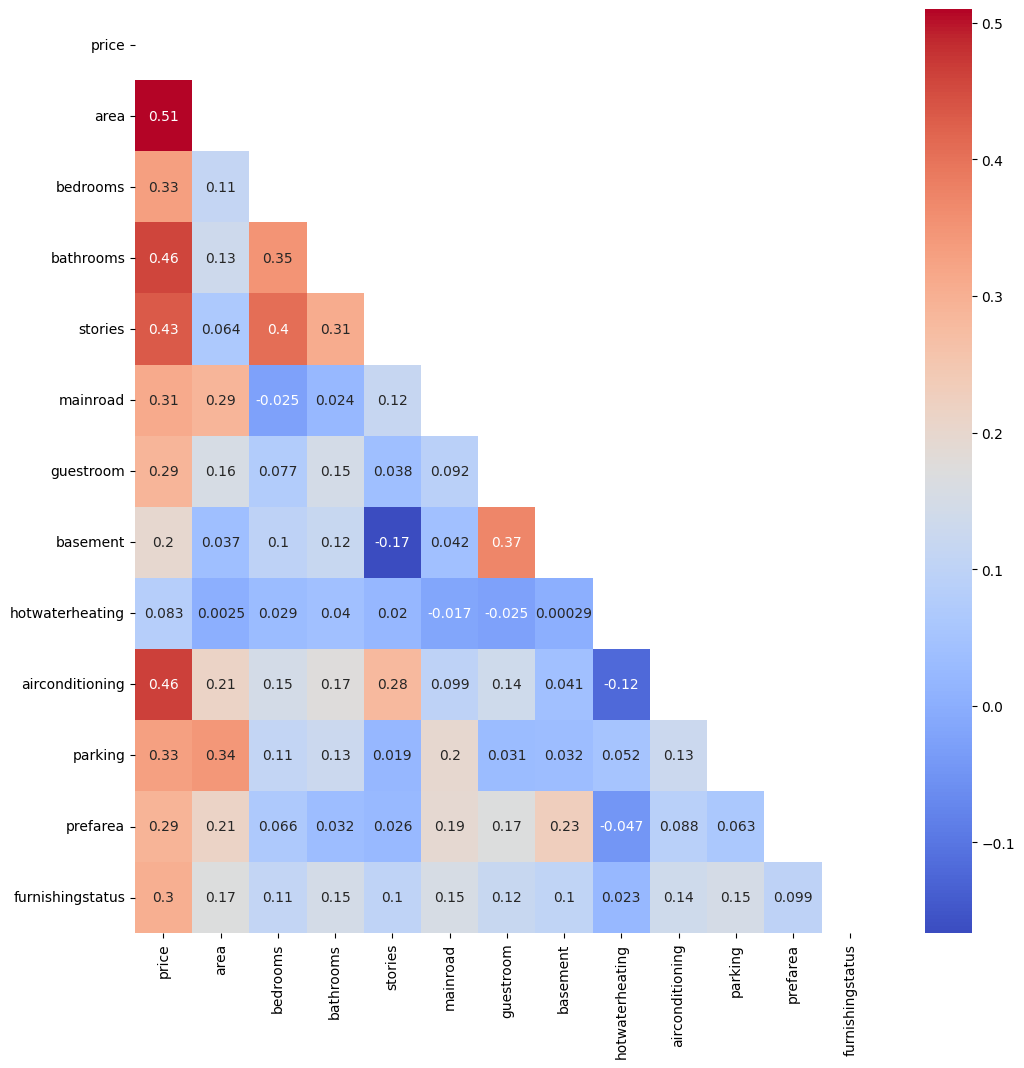

In [20]:
# Correlation Heatmap
corr = df.corr()

# Mask to remove duplicate correlations
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm');

# Price is correlated most with area, bathrooms, air conditioning and stories of the house

In [21]:
# Feature Engineering

# Price / Area
df['Price_Per_Area'] = df['price'] / df['area']

# Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_Per_Area,total_rooms
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0.5,1516.666667,5
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0.0,1378.787879,7
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1.0,1054.117647,5
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1.0,1932.608696,6
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0.5,1379.283489,5


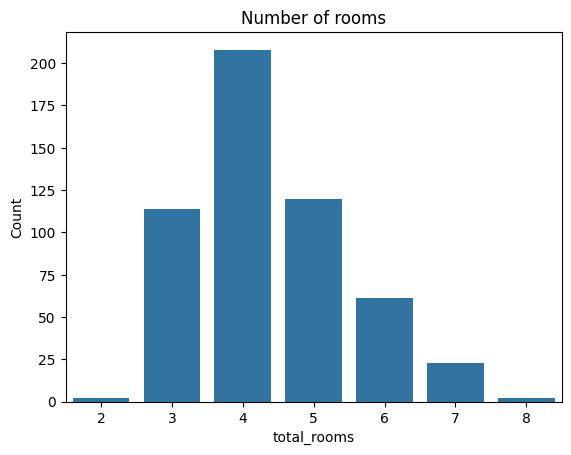

In [23]:
# Total rooms
sns.countplot(x='total_rooms', data=df)
plt.title("Number of rooms")
plt.ylabel('Count')
plt.show();

# From bedrooms, bathrooms, and guestrooms, most properties have 4.

On average, you can expect to pay 981.1816 per square foot
There is a total of 240 houses with price per sq ft over the mean, which equates to 45.283 % of the data


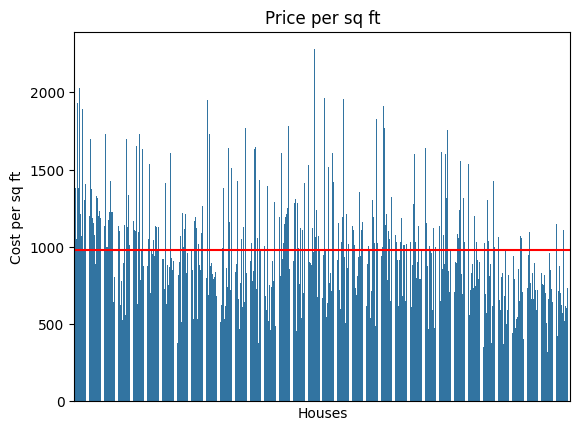

In [24]:
#Calculate Mean price per sq ft per home
meanprice = round(df['Price_Per_Area'].mean(), 4)

# Barplot representing cost per sq ft, per house
sns.barplot(df['Price_Per_Area'])
# Add mean line
plt.axhline(meanprice, color='red')
plt.title('Price per sq ft')
plt.xlabel('Individual Homes')
plt.xticks([])
plt.ylabel('Cost per sq ft');

print(f"On average, you can expect to pay",meanprice,"per square foot")

# Find the percent of houses in the dataset that cost more than the mean
countovermean = (df['Price_Per_Area'] >= meanprice).sum()
percent_fromtotal = round(countovermean / len(df) * 100, 4)
print(f"There is a total of",countovermean,"houses with price per sq ft over the mean, which equates to",percent_fromtotal,"% of the data")

In [25]:
df.shape

(530, 15)

### Exploratory Data Analysis Summary

* The dataset contained no missing values or duplicated rows.
* Using the IQR, 15 outliers were identified in the price column, and removed from the data.
* 3 bedrooms with 1 bathroom is most common for homes in the dataset.
* 1-2 stories is common, with some homes having up to 4.
* The price of a home is correlated most with the area (in sq ft), number of bathrooms, air conditioning, and number of stories the house contains.
* On average, you can expect to pay approximately $993 per square foot of property.